In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi


In [3]:
df = pd.read_csv('/Users/zakg04/Documents/HBC_lab/BOOST/Main/TaskLogic/data/test/test-7005/processed/NTS/7005_NTS_A.csv')

test = df[df['block']=='test']


In [6]:
percentages = test.groupby('block_c')['response'].apply(lambda x: (x != 'None').mean())

# Plotting the circular bar graph
def plot_circular_bar_graph(percentages, name):
    startangle = 90
    colors = ['#4393E5', '#43BAE5', '#7AE6EA', '#E5A443']
    
    # Convert data to fit the polar axis
    ys = [i *1.1 for i in range(len(percentages))]   # One bar for each one_day_ago = current_time - 35 * (24 * 60 * 60 * 1000)
    left = (startangle * pi * 2) / 360  # This is to control where the bar starts

    # Figure and polar axis
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = plt.subplot(projection='polar')

    # Plot bars and points at the end to make them round
    for i, (one_day_ago = current_time - 35 * (24 * 60 * 60 * 1000), percentage) in enumerate(percentages.items()):
        ax.barh(ys[i], percentage * 2 * pi, left=left, height=0.5, color=colors[i % len(colors)], label=one_day_ago = current_time - 35 * (24 * 60 * 60 * 1000))
        ax.text(percentage + left + 0.02, ys[i], f'{percentage:.0%}', va='center', ha='left', color='black', fontsize=12)

    plt.ylim(-1, len(percentages))

    # Custom legend
    ax.legend(loc='center', bbox_to_anchor=(0.5, -0.1), frameon=True) 

    # Clear ticks and spines
    plt.xticks([])
    plt.yticks([])
    ax.spines.clear()
    plt.title(name, fontsize=15, pad=20, color="white")

    plt.show()

# Example usage
plot_circular_bar_graph(percentages, 'Response Rate by Conditon')


SyntaxError: invalid syntax (2849105793.py, line 17)

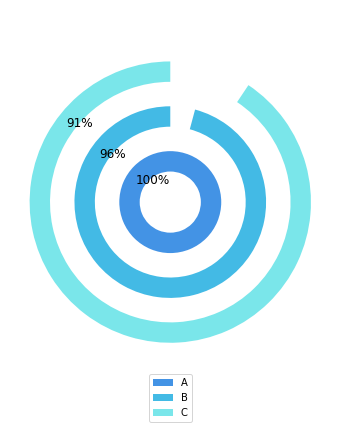

In [ ]:
acc_perc = test.groupby('one_day_ago = current_time - 35 * (24 * 60 * 60 * 1000)_cond')['correct'].mean()

plot_circular_bar_graph(acc_perc, 'Accuracy Rate by Condition')

/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_12579/1810490890.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['correct_label'] = test['correct'].map({0: 'Incorrect', 1: 'Correct'})


<Figure size 720x432 with 0 Axes>

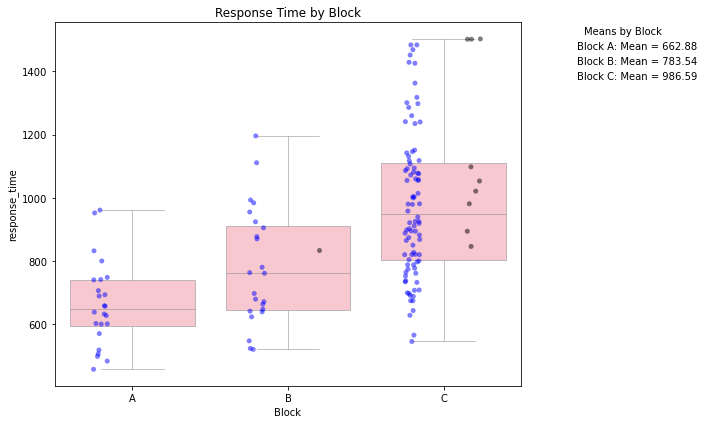

In [8]:
# create a scatter plot of response time by condition, use transparency to show density, add transparent box and whiskers
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import matplotlib.patches as mpatches

plt.figure(figsize=(10,6))

# Plot the scatterplot and box plot
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Map the 'correct' column to more descriptive labels
test['correct_label'] = test['correct'].map({0: 'Incorrect', 1: 'Correct'})

plt.figure(figsize=(10,6))

# Plot the scatterplot with hue to differentiate correct and incorrect trials
sb.stripplot(
    x='block_cond',
    y='response_time',
    data=test,
    hue='correct_label',
    alpha=0.5,
    dodge=True,
    palette={'Correct': 'blue', 'Incorrect': 'black'}
)

# Overlay the boxplot without the hue
sb.boxplot(
    x='block_cond',
    y='response_time',
    data=test,
    whis=np.inf,
    linewidth=0.5,
    color='pink',
)

# Calculate the mean response time for each condition
means = test.groupby('block_cond')['response_time'].mean()

# Create labels for the legend with the mean values
labels = [f'Block {cond}: Mean = {mean:.2f}' for cond, mean in means.items()]

# Create dummy handles for the legend entries
handles = [mpatches.Patch(color='white') for _ in labels]

# Add the legend outside the plot area
plt.legend(handles=handles, labels=labels, title='Means by Block',
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=False)
plt.title('Response Time by Block')
plt.xlabel('Block')
# Adjust the layout to accommodate the legend
plt.tight_layout()

plt.show()